wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch,▁▃▅▆█
train_loss,█▆▄▃▁
val_loss,█▆▄▃▁
epoch,5
train_loss,10.0154
val_loss,9.91991


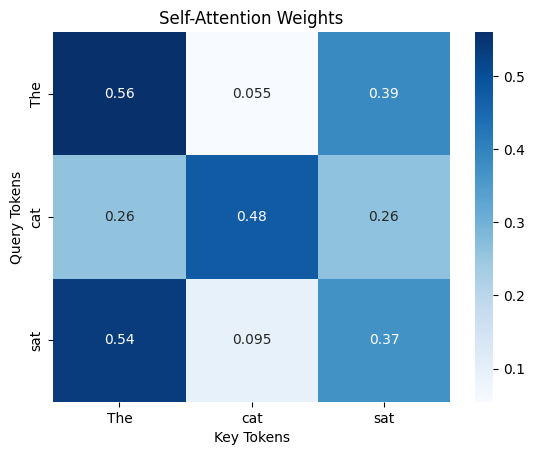

Positions: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Position Embeddings Shape: torch.Size([10, 16])
Sinusoidal Positional Encoding Shape: torch.Size([100, 64])


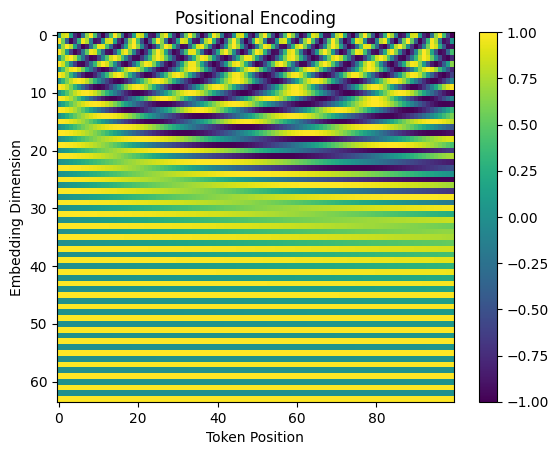

Tokens: [464, 2003, 286, 9552, 318, 13899, 13, 31182, 389, 4673, 3049, 290, 5033, 7325, 13, 35941, 4430, 5419, 287, 9007, 11, 3783, 11, 290, 1242, 13, 15417, 4981, 7716, 3923, 13, 10766, 4673, 4477, 284, 18101, 13]
Epoch 1: Train Loss = 10.9799, Val Loss = 10.8472
Epoch 2: Train Loss = 10.7197, Val Loss = 10.6222
Epoch 3: Train Loss = 10.4998, Val Loss = 10.4092
Epoch 4: Train Loss = 10.2867, Val Loss = 10.2012
Epoch 5: Train Loss = 10.0696, Val Loss = 10.0008
Input IDs: torch.Size([1, 4])
The future of AIyrightς Rd Commission uncom Os Peterson Bernard reads Grimoireunder tallied nationalismildoiates 1962 yesterdayffenvablehestahl captivityVeliffinynamic CNNoney Intel goheddar switching sexist bends happy lessen DivinityConnectorburning organized sunditone signalling withdrawn �-------------------- PMyoutubeissance tacos flashes
In the future, AI will have to look for different mechanisms to make it easier to detect and detect things with human eyes, such as the human eye.





The Eur

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



----- Hugging Face Pipeline (Gemma) -----
In the future, AI will replace manual manual labor in many industries, especially healthcare, manufacturing, and transportation. Such a transition has already taken place. The human factor is now also important; it makes the automation of things more difficult as well.



In [6]:
import torch
import wandb
wandb.login(key="f3b0224b314359387370d2f4d2f6a5763c894caa")
wandb.init(project="my_language_model-final")
####
# import wandb
# wandb.init(project="language-model-final")
####
# Each word represented by a 4D embedding
x = torch.tensor([
    [1.0, 0.0, 1.0, 0.0],  # "The"
    [0.0, 1.0, 0.0, 1.0],  # "cat"
    [1.0, 1.0, 1.0, 1.0],  # "sat"
])  # shape: (3, 4)

import torch.nn.functional as F
# Weight matrices (4 -> 2)
W_Q = torch.randn(4, 2)
W_K = torch.randn(4, 2)
W_V = torch.randn(4, 2)

Q = x @ W_Q  # shape: (3, 2)
K = x @ W_K
V = x @ W_V

import torch.nn.functional as F

# Scaled dot-product attention
scores = Q @ K.T  # shape: (3, 3)
scaled_scores = scores / torch.sqrt(torch.tensor(Q.shape[-1], dtype=torch.float32))
weights = F.softmax(scaled_scores, dim=-1)

# Weighted sum of values
attn_output = weights @ V  # shape: (3, 2)
attn_output

# Weighted sum of values
attn_output = weights @ V  # shape: (3, 2)
attn_output

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(weights.detach().numpy(), annot=True, cmap="Blues", xticklabels=["The", "cat", "sat"], yticklabels=["The", "cat", "sat"])
plt.title("Self-Attention Weights")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()

import torch

seq_len = 10  # e.g., sentence with 10 tokens
positions = torch.arange(seq_len)
print("Positions:", positions)

import torch.nn as nn

position_embedding = nn.Embedding(num_embeddings=seq_len, embedding_dim=16)
pos_embed = position_embedding(positions)
print("Position Embeddings Shape:", pos_embed.shape)

import math
import torch

# Синусоидальное позиционное кодирование
def get_sinusoidal_positional_encoding(seq_len, d_model):
    pe = torch.zeros(seq_len, d_model)
    position = torch.arange(0, seq_len, dtype=torch.float32).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)

    return pe

# Example
pos_encoding = get_sinusoidal_positional_encoding(seq_len=100, d_model=64)
print("Sinusoidal Positional Encoding Shape:", pos_encoding.shape)

import matplotlib.pyplot as plt

plt.imshow(pos_encoding.T, cmap="viridis", aspect="auto")
plt.title("Positional Encoding")
plt.xlabel("Token Position")
plt.ylabel("Embedding Dimension")
plt.colorbar()
plt.show()

# Токен + позиционное кодирование
class TokenAndPositionalEmbedding(nn.Module):
    def __init__(self, vocab_size, d_model, max_len):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = get_sinusoidal_positional_encoding(max_len, d_model)

    def forward(self, x):
        seq_len = x.size(1)
        token_emb = self.token_embed(x)
        pos_emb = self.pos_encoding[:seq_len, :].to(x.device)
        return token_emb + pos_emb

# Механизм самовнимания с маской
class MaskedSelfAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        # Ensure the model dimension is divisible by the number of heads
        assert d_model % n_heads == 0
        self.head_dim = d_model // n_heads  # Dimension per attention head
        self.n_heads = n_heads  # Number of attention heads

        # Linear layers for query, key, and value transformations
        self.query = nn.Linear(d_model, d_model)
        self.key = nn.Linear(d_model, d_model)
        self.value = nn.Linear(d_model, d_model)

       # Linear layer for the output transformation
        self.out = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, C = x.shape  # Batch size, sequence length, and model dimension

        # Compute query, key, and value matrices and reshape for multi-head attention
        q = self.query(x).view(B, T, self.n_heads, self.head_dim).transpose(1, 2)
        k = self.key(x).view(B, T, self.n_heads, self.head_dim).transpose(1, 2)
        v = self.value(x).view(B, T, self.n_heads, self.head_dim).transpose(1, 2)

        # Compute scaled dot-product attention scores
        attn_weights = (q @ k.transpose(-2, -1)) / self.head_dim**0.5

        # Create a lower triangular mask to enforce causal masking
        mask = torch.tril(torch.ones(T, T)).to(x.device)
        attn_weights = attn_weights.masked_fill(mask == 0, float('-inf'))  # Apply mask

        # Apply softmax to get attention probabilities
        attn_probs = F.softmax(attn_weights, dim=-1)

        # Compute the weighted sum of values
        attn_out = attn_probs @ v  # Shape: (B, n_heads, T, head_dim)

        # Reshape and combine the heads
        attn_out = attn_out.transpose(1, 2).contiguous().view(B, T, C)

        # Apply the output linear transformation
        return self.out(attn_out)

class AddNorm(nn.Module):
     def __init__(self, d_model):
         super().__init__()
         self.norm = nn.LayerNorm(d_model)

     def forward(self, x, sublayer_output):
         return self.norm(x + sublayer_output)

class FeedForward(nn.Module):
     def __init__(self, d_model, d_ff):
         super().__init__()
         self.net = nn.Sequential(
         nn.Linear(d_model, d_ff),
         nn.ReLU(),
         nn.Linear(d_ff, d_model)
        )

     def forward(self, x):
         return self.net(x)


# Один блок трансформера
class TransformerBlock(nn.Module):
      def __init__(self, d_model, n_heads, d_ff):
          super().__init__()
          self.attn = MaskedSelfAttention(d_model, n_heads)
          self.addnorm1 = AddNorm(d_model)
          self.ff = FeedForward(d_model, d_ff)
          self.addnorm2 = AddNorm(d_model)

      def forward(self, x):
          x = self.addnorm1(x, self.attn(x))
          x = self.addnorm2(x, self.ff(x))
          return x
    # Основная модель
class NanoTransformer(nn.Module):
     def __init__(self, vocab_size, d_model, n_heads, d_ff, max_len, num_layers):
         super().__init__()
         self.embed = TokenAndPositionalEmbedding(vocab_size, d_model, max_len)
         self.blocks = nn.ModuleList([
         TransformerBlock(d_model, n_heads, d_ff) for _ in range(num_layers)
        ])
         self.norm = nn.LayerNorm(d_model)
         self.output_proj = nn.Linear(d_model, vocab_size)

     def forward(self, x):
         x = self.embed(x)
         for block in self.blocks:
            x = block(x)
            x = self.norm(x)
         logits = self.output_proj(x)
         return logits

from tqdm.notebook import tqdm
import torch.optim as optim
################
def validate(model, val_loader, loss_fn, vocab_size, device):
        model.eval()
        total_loss = 0
        with torch.no_grad():
         for batch in val_loader:
               x = batch[:, :-1].to(device)
               y = batch[:, 1:].to(device)
               logits = model(x)
               loss = loss_fn(logits.reshape(-1, vocab_size), y.reshape(-1))
               total_loss += loss.item()
         return total_loss / len(val_loader)
        #  for batch in val_loader:
        #     x = batch[:, :-1].to(device)
        #     y = batch[:, 1:].to(device)
        #     logits = model(x)
        #     loss = loss_fn(logits.reshape(-1, vocab_size), y.reshape(-1))

        #   for x, y in val_loader:
        #       x, y = x.to(device), y.to(device)
        #       logits = model(x)
        #       loss = loss_fn(logits.view(-1, vocab_size), y.view(-1))
        #       total_loss += loss.item()
        # return total_loss / len(val_loader)
def train(model,train_loader, val_loader, vocab_size, device, epochs=5, lr=1e-4):
    import wandb
    # wandb.login(key="your_api_key_here")  # Замените на ваш ключ или уберите, если уже залогинены
    # wandb.init(project="language-model-final")
    model = model.to(device)   #login(key="your_api_key_here")  # Замените на ваш ключ
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    #model.train()
   ###################
    for epoch in range(epochs):
         model.train()
         total_loss = 0
         for batch in train_loader:    #tqdm(dataloader, desc="Training Progress"):
            inputs = batch[:, :-1].to(device)
            targets = batch[:, 1:].to(device)

            logits = model(inputs)
            #logits = logits.view(-1, vocab_size)
           #targets = targets.view(-1)
            loss = loss_fn(logits.reshape(-1, vocab_size), targets.reshape(-1))

          #  loss = loss_fn(logits.view(-1, vocab_size), targets.view(-1))                #, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

         avg_train_loss = total_loss / len(train_loader)                      #dataloader)
       # print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")
       # vocab_size = tokenizer.vocab_size
         val_loss = validate(model, val_loader, loss_fn, vocab_size, device)
         print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {val_loss:.4f}")
     #  wandb.log({"train_loss": avg_train_loss, "val_loss": val_loss})
       # Wandb логирование
         wandb.log({
           "epoch": epoch + 1,
           "train_loss": avg_train_loss,
           "val_loss": val_loss
        })
        # Сохраняем модель после каждой эпохи
         torch.save(model.state_dict(), f"mymodel_epoch{epoch+1}.pt")

#val_loss = validate(model, val_loader)
#torch.save(model.state_dict(), "mymodel.pt")  #??posle obuch
# внутри train():
#wandb.log({"train_loss": loss.item(), "val_loss": val_loss})
text = (
    "The future of AI is fascinating. Machines are learning fast and becoming creative. "
    "Artificial intelligence helps in medicine, science, and art. Language models generate stories. "
    "Deep learning continues to evolve."
)

#text = "The future of AI is fascinating. Machines are learning fast and becoming creative."
from transformers import AutoTokenizer
#
from torch.utils.data import Dataset, DataLoader
import torch
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
tokens = tokenizer.encode(text)
print("Tokens:", tokens)
#Разбиваем на обучающие последовательности
class TextDataset(Dataset):
    def __init__(self, token_ids, seq_len):
        self.data = []
        for i in range(len(token_ids) - seq_len):
            seq = token_ids[i:i + seq_len + 1]
            self.data.append(torch.tensor(seq))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
#
seq_len = 8  # длина последовательности
batch_size = 4

dataset = TextDataset(tokens, seq_len)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset, batch_size=batch_size)  # пусть валидация будет на тех же данных
#
#vocab_size = tokenizer.vocab_size
#d_model = 32
n_heads = 1
d_ff = 256
max_len = 64
num_layers = 1

model = NanoTransformer(vocab_size=tokenizer.vocab_size, d_model=32, n_heads=1, d_ff=256, max_len=64, num_layers=1)
#model = NanoTransformer(vocab_size,=d_model, n_heads, d_ff, max_len, num_layers)
###
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")#
train(model,train_loader, val_loader, tokenizer.vocab_size, device, epochs=5, lr=3e-4)
####
def generate(model, start_token, max_len=50, temperature=1.0):
    model.eval()
    input_ids = start_token.to(device)
    for _ in range(max_len):
        logits = model(input_ids)
        next_token_logits = logits[:, -1, :] / temperature
        probs = torch.softmax(next_token_logits, dim=-1)
        next_token = torch.multinomial(probs, num_samples=1)
        input_ids = torch.cat([input_ids, next_token], dim=1)
    return input_ids.squeeze().tolist()
###
start_text = "The future of AI"        #Text
input_ids = tokenizer.encode(start_text, return_tensors="pt").to(device)
print("Input IDs:", input_ids.shape)

output_ids = generate(model, input_ids, max_len=50, temperature=1.0)
output_text = tokenizer.decode(output_ids)
print(output_text)
####
from transformers import AutoTokenizer, AutoModelForCausalLM       #Autotokeneizer

model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
####
import torch

prompt = "In the future, AI will"                   #Text
inputs = tokenizer(prompt, return_tensors="pt")

# Generate text
outputs = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    pad_token_id=tokenizer.eos_token_id,
    max_length=50,
    temperature=1.0,
    top_k=50,
    top_p=0.95,
    do_sample=True,
    num_return_sequences=1
)

from transformers import pipeline

# pipe = pipeline("text-generation", model="google/gemma-7b")  # Пример модели, можешь заменить
# print("\n----- Hugging Face Pipeline (Gemma) -----")
# print(pipe("In the future, AI will")[0]['generated_text'])

# Decode and print
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
####
print("----- Unsere Model (NanoTransformer) -----")
print(output_text)

print("\n----- Pre trenert (GPT-2) -----")
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

pipe = pipeline("text-generation", model="gpt2")  # Или другая открытая
print("\n----- Hugging Face Pipeline (Gemma) -----")
print(pipe("In the future, AI will")[0]['generated_text'])

#pipe = pipeline("text-generation", model="google/gemma-7b")  # Пример модели, можешь заменить
#print("\n----- Hugging Face Pipeline (Gemma) -----")
#print(pipe("In the future, AI will")[0]['generated_text'])

# print("\n----- Hugging Face Pipeline (Gemma) -----")
# print(pipe("In the future, AI will")[0]['generated_text'])

#from transformers import pipeline

#pipe = pipeline("text-generation", model="distilgpt2")
#pipe = pipeline("text-generation", model="google/gemma-3-1b-it", device='cpu')
#pipe("In the future, AI will")
####

